# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #17 Logging in Python

In [1]:
%run video-00.py

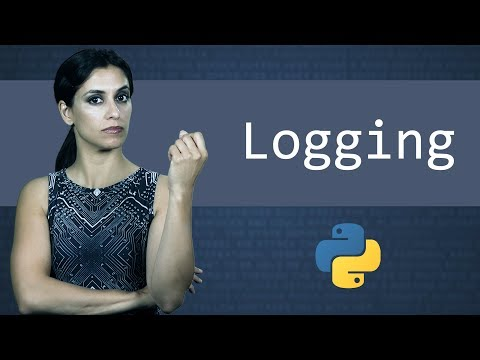

In [2]:
from IPython import display

video = display.YouTubeVideo('g8nQ90Hk328')
video
display.HTML(f'<a href="{video.src}">link</a>')

By having a standard logging module [📖 [docs](https://docs.python.org/3/library/logging.html)], Python eliminates infrastructure chaos on one extreme and a complete lack of logging infrastructure on the other:

>The key benefit of having the logging API provided by a standard library module is that all Python modules can participate in logging, so your application log can include your own messages integrated with messages from third-party modules.

There are at least two programmer intents when importing `logging`:

1. The intent is to _configure_ log output and write log messages to a file or the console.
2. The intent is to write log messages based on the assumption output has already been configured.

The `logging.basicConfig` method (shown below) is a convenience method to configure logging:

In [3]:
import logging

dir(logging)

['BASIC_FORMAT',
 'BufferingFormatter',
 'CRITICAL',
 'DEBUG',
 'ERROR',
 'FATAL',
 'FileHandler',
 'Filter',
 'Filterer',
 'Formatter',
 'Handler',
 'INFO',
 'LogRecord',
 'Logger',
 'LoggerAdapter',
 'Manager',
 'NOTSET',
 'NullHandler',
 'PercentStyle',
 'PlaceHolder',
 'RootLogger',
 'StrFormatStyle',
 'StreamHandler',
 'StringTemplateStyle',
 'Template',
 'WARN',
 'WARNING',
 '_STYLES',
 '_StderrHandler',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__status__',
 '__version__',
 '_acquireLock',
 '_addHandlerRef',
 '_checkLevel',
 '_defaultFormatter',
 '_defaultLastResort',
 '_handlerList',
 '_handlers',
 '_levelToName',
 '_lock',
 '_logRecordFactory',
 '_loggerClass',
 '_nameToLevel',
 '_register_at_fork_reinit_lock',
 '_releaseLock',
 '_removeHandlerRef',
 '_showwarning',
 '_srcfile',
 '_startTime',
 '_warnings_showwarning',
 'addLevelName',
 'atexit',
 'bas

In [4]:
help(logging.basicConfig)

Help on function basicConfig in module logging:

basicConfig(**kwargs)
    Do basic configuration for the logging system.
    
    This function does nothing if the root logger already has handlers
    configured. It is a convenience method intended for use by simple scripts
    to do one-shot configuration of the logging package.
    
    The default behaviour is to create a StreamHandler which writes to
    sys.stderr, set a formatter using the BASIC_FORMAT format string, and
    add the handler to the root logger.
    
    A number of optional keyword arguments may be specified, which can alter
    the default behaviour.
    
    filename  Specifies that a FileHandler be created, using the specified
              filename, rather than a StreamHandler.
    filemode  Specifies the mode to open the file, if filename is specified
              (if filemode is unspecified, it defaults to 'a').
    format    Use the specified format string for the handler.
    datefmt   Use the specified 

### Logging defaults

Let us naïvely setup logging:

In [5]:
import logging

logging.basicConfig(filename='./video-17.log')

logger = logging.getLogger() # gets `root` logger

logger.info('Our first message.')

The code above should generate the `video-17.log` file in the same directory containing this notebook. However, the file should be empty: the `INFO` message is filtered out from logging because of the default logging level of the logger:

In [6]:
logger.level

30

The logging-level constants in the `logging` module show us that the level is `WARNING` by default:

In [7]:
{
    'NOTSET'  :logging.NOTSET,
    'DEBUG'   :logging.DEBUG,
    'INFO'    :logging.INFO,
    'WARNING' :logging.WARNING,
    'ERROR'   :logging.ERROR,
    'CRITICAL':logging.CRITICAL,
}

{'NOTSET': 0,
 'DEBUG': 10,
 'INFO': 20,
 'WARNING': 30,
 'ERROR': 40,
 'CRITICAL': 50}

The `INFO` level is less than `WARNING` and is ignored by default. Let us set our logger to the lowest level, capturing everything:

In [8]:
logger.setLevel(logging.DEBUG) # change logging level to lowest level

logger.info('Our first message.')

logger.level

10

We are allowed to run `logging.basicConfig()` once for every application. We would have to close and reopen this Jupyter notebook to make changes to logging configuration and the root logger. This implies that following basic configuration call will do nothing (but it is here for instructional purposes):

In [9]:
logging.basicConfig(filename='./video-17.log', level=logging.DEBUG)

### Logging with a Formatter

Our log file, `video-17.log`, should have a line like this in it:

```
INFO:root:Our first message.
```

We are seeing the text representation of `LogRecord` [📖 [docs](https://docs.python.org/3/library/logging.html#logging.LogRecord)] using the default formatter, `logging.BASIC_FORMAT`:

In [10]:
logging.BASIC_FORMAT

'%(levelname)s:%(name)s:%(message)s'

By default,

- the logging level (`levelname`)
- the logger `name`
- the log `messaage`

are displayed. We can change this by reviewing [the attributes](https://docs.python.org/3/library/logging.html#logrecord-attributes) of `LogRecord` an setting the `format` argument of `logging.basicConfig()`:

In [11]:
LOG_FORMAT = '%(levelname)s: %(asctime)s - %(message)s'

logging.basicConfig(
    filename='./video-17.log',
    level=logging.DEBUG,
    format=LOG_FORMAT)

Again, this call will do nothing in this notebook because `logging.basicConfig()` has already been called once. We can demonstrate with the following Python script:

In [12]:
!python video-17.py

The formatting convention used for `LOG_FORMAT` is `printf`-style String Formatting [📖 [docs](https://docs.python.org/3/library/stdtypes.html#old-string-formatting)]. There may be an attraction toward more modern string-formatting syntax (like f-string syntax). See “[Using particular formatting styles throughout your application](https://docs.python.org/3/howto/logging-cookbook.html#formatting-styles)” to investigate.